# **讀取資料**

In [1]:
import pandas as pd 
df = pd.read_csv("/Users/wombat/Desktop/課程筆記/政治與資訊/教學資料/CSV 資料集/10802_2020_tclw.csv") #匯資料
df["Post_Date"] = df["Date"].str.split(" ").str.get(0).str.title() #加Post_Date欄位
df['Post_Date'] = pd.to_datetime(df['Post_Date'])

df_yan_New = df[df['Page_Name']=='顏寬恒'][['Message','Post_Date']] #只要顏的文章和時間
df_yan_New = df_yan_New.dropna()

# **結巴斷詞 jieba**
結巴斷詞 jieba
len(df_blue_New)：看國民黨的貼文總共有幾筆，單獨把doc_names印出來發現有482篇
原本df_blue_New['Message']型態是pandas.core.series.Series，需要先轉成list的形式才可以加進去。
接下來我們創造一個新的dataframe叫做df_blue_docs，型態是pandas.core.frame.DataFrame
原本df_blue_docs裡面的'jieba_results'欄位型態是pandas.core.series.Series，需要轉成'str'(字串)型態才能做後續處理。

In [2]:
doc_names = range(len(df_yan_New)) #有幾篇文章
text_list = list(df_yan_New['Message']) #把要斷的東西轉list

#創造空的dataframe叫做df_blue_docs
df_yan_docs = pd.DataFrame(columns=['jieba_results'])

df_yan_docs['jieba_results'] = df_yan_docs['jieba_results'].astype('str')

把要存斷詞結果的dataframe準備好之後，就可以開始斷詞了。

</br>第一個迴圈</br> 剛才我們知道，國民黨的篇數有482篇： 我們可以用一個for迴圈來跑每一篇文章，i是對應文章的意思，會從1(第一篇)跑到482(第482篇)；</br> 而text_list就是我們剛剛轉成list型態的國民黨貼文內容；text_list[1]，就是取出list第一個元素(第一篇貼文)的意思。

</br> 第二個迴圈</br> words存的是文章斷詞後的集合物件(object)，我們需要跑第二個for迴圈把集合裡面的字取出來，</br> word代表斷詞集合中的一個字，先把字轉換成str(字串)型態之後，字和字之間加上空格存在一起。
append加回斷詞欄位</br> 之後把text內容存到'jieba_results'這個欄位裡面，再和df_blue_docs合併。

</br> 最後我們df_blue_docs，只會一個欄位jieba_results，存斷詞之後的結果。

可以參考：https://ithelp.ithome.com.tw/m/articles/10200052

In [3]:
import jieba
from tqdm import tqdm

for i in doc_names: #從第一篇到最後一篇
    words = jieba.cut(text_list[i], cut_all = False)
    
    text = ''
    for word in words:
        text = text + ' ' + str(word)    
    #print(words)
    #print(i) #第幾篇文章
    #print(text) #第幾篇文章的斷詞結果
    
    s = pd.Series({'jieba_results': text})
    df_yan_docs = df_yan_docs.append(s, ignore_index=True)#每次的斷詞結果都加回df_blue_docs


Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/kh/5kz078px0nx16hsxqdd775bh0000gn/T/jieba.cache
Loading model cost 0.750 seconds.
Prefix dict has been built successfully.


In [4]:
df_yan_New.reset_index(inplace=True)

我們把最後得到的df_blue_docs，加到df_blue_New裡面

In [5]:
df_yan_New['jieba_results'] = df_yan_docs
df_yan_New_select = df_yan_New[['jieba_results','Post_Date']]
df_yan_New.head(2)

#可以查看個別貼文的斷詞情況
#df_blue_New['jieba_results'][477]

,index,Message,Post_Date,jieba_results
0,108,《聲明》\n\n選戰結束後許多流言與惡意中傷仍不斷傳出，近日也傳出寬恒將接任台中市政府副市長...,2020-01-14,《 聲明 》 \n \n 選戰 結束 後 許多 流言 與 惡 意中 傷仍 不斷 傳出 ， ...
1,138,先吃飽才有力氣工作啊😁😁😁,2020-01-15,先 吃 飽 才 有力 氣 工作 啊 😁 😁 😁


# **合併資料**

In [6]:
df["Page_Name"] = df["Page_Name"].str.replace("三民惟新 陳柏惟","3Q 陳柏惟")

In [7]:
df_green = df[df['Page_Name']=='3Q 陳柏惟']
df_green_New = df_green[['Post_Date', 'Message']]
df_green_New = df_green_New.dropna()
df_green_New['Message']

doc_names = range(len(df_green_New))
text_list = list(df_green_New['Message'])
df_green_docs = pd.DataFrame(columns=['jieba_results'])
df_green_docs['jieba_results'] = df_green_docs['jieba_results'].astype('str')

for i in doc_names:
    words = jieba.cut(text_list[i], cut_all = False)
    text = ''
    for word in words:
        text = text + ' ' + str(word)
    s = pd.Series({'jieba_results': text})
    df_green_docs = df_green_docs.append(s, ignore_index=True)  
    
df_green_New.reset_index(inplace=True)  #不設定的話會有錯亂的情形，data對不起來
df_green_New['jieba_results'] = df_green_docs
df_green_New['df_class'] = 'green'
df_green_New.head()

,index,Post_Date,Message,jieba_results,df_class
0,0,2020-01-12,【陳柏惟-勝選感言】\n\n謝謝你們，你們做到了。\n\n半年前，我來到這邊的時候，99%的...,【 陳 柏惟 - 勝選 感言 】 \n \n 謝謝 你 們 ， 你們 做到 了 。 \n ...,green
1,1,2020-01-11,凍蒜啦!!!,凍蒜 啦 ! ! !,green
2,3,2020-01-12,想找一張最冷靜的找不到，就找一張圖文不符的\n\n--\n\n很多事情要做，很多話想說\n\...,想 找 一張 最 冷靜 的 找 不到 ， 就 找 一張 圖文 不符 的 \n \n -- ...,green
3,4,2020-01-11,我現在心中只有感謝，等等要寫一篇像打贏大專杯的超級長文，但是因為要打很久，所以電話跟訊息都沒...,我現 在 心中 只有 感謝 ， 等等 要 寫 一篇 像 打 贏大 專杯 的 超級 長 文 ...,green
4,5,2020-01-11,有那個周六下午沒人的烏日三榮路高鐵球場？\n\n我等你，你帶球，到1540.\n\n沒投票的...,有 那個 周六 下午 沒人 的 烏日 三榮路 高鐵球場 ？ \n \n 我 等 你 ， 你...,green


In [8]:
df_blue = df[df['Page_Name']=='顏寬恒']

df_blue_New = df_blue[['Post_Date', 'Message']]
df_blue_New = df_blue_New.dropna()
df_blue_New['Message']

doc_names = range(len(df_blue_New))
text_list = list(df_blue_New['Message'])
df_blue_docs = pd.DataFrame(columns=['jieba_results'])
df_blue_docs['jieba_results'] = df_blue_docs['jieba_results'].astype('str')

for i in doc_names:
    words = jieba.cut(text_list[i], cut_all = False)
    text = ''
    for word in words:
        text = text + ' ' + str(word)
    s = pd.Series({'jieba_results': text})
    if(text=='NAN'):
        print(text_list[i])
    elif(text==''):
        print(text_list[i])
    df_blue_docs = df_blue_docs.append(s, ignore_index=True)  
    
df_blue_New.reset_index(inplace=True)        
df_blue_New['jieba_results'] = df_blue_docs
df_blue_New['df_class'] = 'blue'
df_blue_New.head()

,index,Post_Date,Message,jieba_results,df_class
0,108,2020-01-14,《聲明》\n\n選戰結束後許多流言與惡意中傷仍不斷傳出，近日也傳出寬恒將接任台中市政府副市長...,《 聲明 》 \n \n 選戰 結束 後 許多 流言 與 惡 意中 傷仍 不斷 傳出 ， ...,blue
1,138,2020-01-15,先吃飽才有力氣工作啊😁😁😁,先 吃 飽 才 有力 氣 工作 啊 😁 😁 😁,blue
2,163,2020-01-11,深深一鞠躬，感謝大家，謝謝這段時間所有好朋友、志工夥伴、競選團隊，是寬恒努力不夠。\n\n寬...,深深 一 鞠躬 ， 感謝 大家 ， 謝謝 這段 時間 所有 好 朋友 、 志工夥伴 、 競...,blue
3,173,2020-01-12,《感恩有您》\n\n昨晚不斷的收到加油打氣的訊息，今天謝票時也有許多鄉親依然對我比了大大的讚...,《 感恩 有 您 》 \n \n 昨晚 不斷 的 收到 加油 打氣 的 訊息 ， 今天 謝...,blue
4,183,2019-09-14,🤔每年都是忙到忘記自己生日，今年從早到晚都有很多熱情的鄉親祝我生日快樂🎂，反倒有點不好意思，...,🤔 每年 都 是 忙 到 忘記 自己 生日 ， 今年 從 早 到 晚 都 有 很多 熱情 ...,blue


In [9]:
mergeData = df_blue_New.append(df_green_New)
mergeData = mergeData.dropna() #刪除有NAN值的data
mergeData

,index,Post_Date,Message,jieba_results,df_class
0,108,2020-01-14,《聲明》\n\n選戰結束後許多流言與惡意中傷仍不斷傳出，近日也傳出寬恒將接任台中市政府副市長...,《 聲明 》 \n \n 選戰 結束 後 許多 流言 與 惡 意中 傷仍 不斷 傳出 ， ...,blue
1,138,2020-01-15,先吃飽才有力氣工作啊😁😁😁,先 吃 飽 才 有力 氣 工作 啊 😁 😁 😁,blue
2,163,2020-01-11,深深一鞠躬，感謝大家，謝謝這段時間所有好朋友、志工夥伴、競選團隊，是寬恒努力不夠。\n\n寬...,深深 一 鞠躬 ， 感謝 大家 ， 謝謝 這段 時間 所有 好 朋友 、 志工夥伴 、 競...,blue
3,173,2020-01-12,《感恩有您》\n\n昨晚不斷的收到加油打氣的訊息，今天謝票時也有許多鄉親依然對我比了大大的讚...,《 感恩 有 您 》 \n \n 昨晚 不斷 的 收到 加油 打氣 的 訊息 ， 今天 謝...,blue
4,183,2019-09-14,🤔每年都是忙到忘記自己生日，今年從早到晚都有很多熱情的鄉親祝我生日快樂🎂，反倒有點不好意思，...,🤔 每年 都 是 忙 到 忘記 自己 生日 ， 今年 從 早 到 晚 都 有 很多 熱情 ...,blue
...,...,...,...,...,...
2347,11044,2019-07-25,「抗韓戰神」陳柏惟槓上「松山鄧麗君」徐巧芯，\n柏惟柏惟得第一！,「 抗 韓戰神 」 陳 柏惟槓 上 「 松山 鄧麗君 」 徐巧 芯 ， \n 柏惟柏惟得 ...,green
2348,11070,2019-08-03,袂安怎對你說出心內話？\n天氣熾熱，心底暖熱，眼眶溫熱。\n#高雄你聽我說\n#找回初衷併肩...,袂 安 怎 對 你 說 出心 內話 ？ \n 天氣 熾熱 ， 心底 暖熱 ， 眼眶 溫熱 ...,green
2349,11102,2019-07-02,感謝粉絲依秀，特製私人應援T。\n大家都說我很兇，沒想到有天也能這麼粉紅。\n這件雖然非官方...,感謝 粉絲 依秀 ， 特 製 私人 應援 T 。 \n 大家 都 說 我 很 兇 ， 沒 ...,green
2350,11107,2019-06-12,【反送中，撤惡法】高雄場\n\n雖然立法會宣布延審，但惡法再延也是惡法，惡霸依然是惡霸，這是...,【 反送 中 ， 撤惡法 】 高雄場 \n \n 雖然 立法 會 宣布 延審 ， 但 惡法...,green


# **TF-IDF**
我們把剛才斷好詞的貼文，轉成list形式，全部放到corpus變數裡面，方便做tf-idf處理。

CountVectorizer算字頻（搭配fit_transform）
TfidfTransformer計算TFIDF

可以參考文章：https://ithelp.ithome.com.tw/articles/10228481?sc=iThelpR

In [10]:
corpus = mergeData['jieba_results'].values.tolist()

In [11]:
# TF-IDF
# coding:utf-8  

#算字頻
from sklearn.feature_extraction.text import CountVectorizer  
vectorizer = CountVectorizer()  
X = vectorizer.fit_transform(corpus)  
word = vectorizer.get_feature_names()  

#計算TFIDF
from sklearn.feature_extraction.text import TfidfTransformer  
transformer = TfidfTransformer()  
tfidf = transformer.fit_transform(X)

In [12]:
len(corpus)
features = tfidf.toarray() #轉矩陣
labels = mergeData['Post_Date'].values #Post_Date
labels

array(['2020-01-14T00:00:00.000000000', '2020-01-15T00:00:00.000000000',
       '2020-01-11T00:00:00.000000000', ...,
       '2019-07-02T00:00:00.000000000', '2019-06-12T00:00:00.000000000',
       '2019-03-20T00:00:00.000000000'], dtype='datetime64[ns]')

# **PCA**

In [13]:
from pandas import DataFrame, read_csv
import numpy as np
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
transData = pca.fit_transform(features, labels)
type(transData)
mergeData['pca1'] = DataFrame(transData[:,0])
mergeData['pca2'] = DataFrame(transData[:,1])
#mergeData.head()
print(features)
print(transData)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[-0.04555705 -0.02077112]
 [-0.03419413 -0.00776161]
 [-0.02527401 -0.01901658]
 ...
 [-0.02014997 -0.00287413]
 [-0.05091902 -0.01453797]
 [-0.03142149 -0.00624284]]


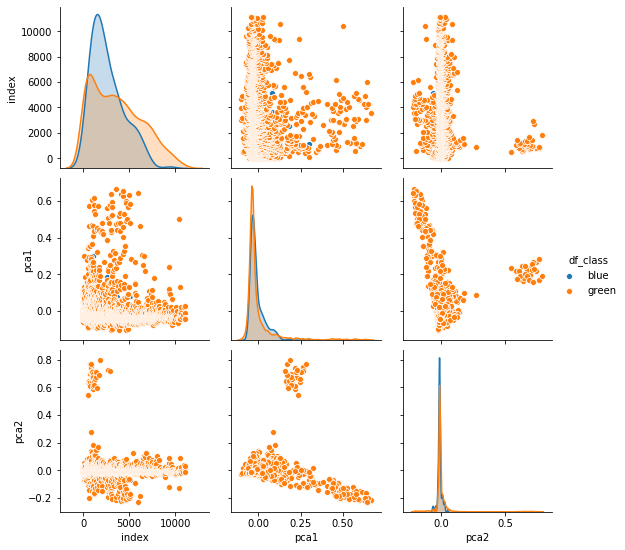

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(kind = 'scatter',data=mergeData,hue="df_class", diag_kind="kde",height=2.5)

In [22]:
textFrame = pd.DataFrame(features, columns = word)
textFrame

,00,000,0000,0010821682,00pm,01,0103,0110,0111,0113,...,龍馬為,龍體,龍龍,龐克,龐克樂,龐大,龐大經濟,龐巴迪,龙放,龜叔
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2591,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2592,0.182348,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2593,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2594,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
allF = features.flatten()
nonZero = allF[np.nonzero(allF)]
m = np.median(nonZero)

In [25]:
allF[np.nonzero(allF)]

array([0.10630356, 0.04199747, 0.09437978, ..., 0.09880885, 0.60170933,
       0.79871514])

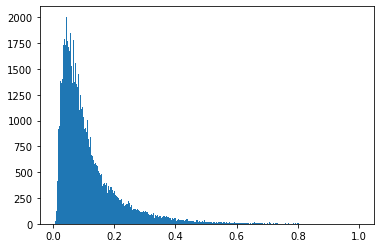

0.08412815440466845

In [26]:
plt.hist(nonZero, bins=500)
plt.show()
m

# **第三張圖**
**粉專文字雲比較**

In [38]:
import pandas as pd
import jieba

df = pd.read_csv("/Users/wombat/Desktop/課程筆記/政治與資訊/教學資料/CSV 資料集/10802_2020_tclw.csv") #匯資料
df["Post_Date"] = df["Date"].str.split(" ").str.get(0).str.title() #加Post_Date欄位

df_blue_New = df[df['Page_Name']=='顏寬恒'][['Message']] 
df_green_New = df[df['Page_Name']=='3Q 陳柏惟'][['Message']] 

df_blue_New = df_blue_New.dropna()
df_green_New = df_green_New.dropna()

In [39]:
def stopwordslist(filepath):  
    stopwords = [line.strip() for line in open(filepath, 'r', encoding='utf-8').readlines()]  
    return stopwords  

def seg_sentence(sentence):  
    jieba.load_userdict("dict/user.txt")
    sentence_seged = jieba.cut(sentence)  
    stopwords = stopwordslist('dict/stop_words.txt') 
    outstr = ''  
    for word in sentence_seged:  
        if word not in stopwords:  
            if word != '\t':  
                outstr += word  
                outstr += ' ' 
    return outstr  

def not_load_dict(sentence):
    sentence_seged = jieba.cut(sentence)  
    outstr = ''  
    for word in sentence_seged:  
        outstr += word  
        outstr += ' ' 
    return outstr  

def get_list(df):
    index_ = list(df.index)
    word_list =''
    for i in index_:
        word_list += df['Message'][i]
    
    return word_list

## **顏寬恒的文字雲**

In [40]:
#呼叫上面的函式進行斷詞
word_list = get_list(df_blue_New)
test = seg_sentence(word_list)

In [41]:
#畫出文字雲
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt

font = '/Users/wombat/Desktop/素材/字體/漢儀辛蒂唐朝體.ttf'
sns.set(rc={'figure.figsize':(10,6)})
my_wordcloud = WordCloud(background_color="white", scale=4, font_path=font,
                         max_words = 100,max_font_size = 60,random_state=20).generate(test)
my_wordcloud.to_file('img/blue_cloud.jpg')

![title](img/blue_cloud.jpg)

## **3Q 陳柏惟的文字雲**

In [42]:
word_list = get_list(df_green_New)
test = seg_sentence(word_list)

sns.set(rc={'figure.figsize':(10,6)})
my_wordcloud = WordCloud(background_color="white", scale=4, font_path=font,
                         max_words = 100,max_font_size = 60,random_state=20).generate(test)
my_wordcloud.to_file('img/green_cloud.jpg')
# plt.imshow(my_wordcloud)
# plt.axis("off")
# plt.show()

![title](img/green_cloud.jpg)

## **共線圖**

In [124]:
import pandas as pd
import jieba
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

df = pd.read_csv("/Users/wombat/Desktop/課程筆記/政治與資訊/教學資料/CSV 資料集/10802_2020_tclw.csv") #匯資料
df["Post_Date"] = df["Date"].str.split(" ").str.get(0).str.title() #加Post_Date欄位

df_green_New = df[df['Page_Name']=='3Q 陳柏惟'][['Message','Post_Date']] #只要國民黨的文章和時間
df_terms = df_green_New

In [125]:
#設定停用字
stopWords = []
with open('dict/stop_words.txt', 'r', encoding='UTF-8') as file:
    for data in file.readlines():
        data = data.strip()
        stopWords.append(data)
        
stoplst = [' ', '\xa0']
for words in stoplst:
    stopWords.append(words)

In [126]:
#設定自訂字典
with open('dict/user.txt', 'r', encoding='UTF-8') as file:
    for data in file.readlines():
        data = data.strip()
        jieba.add_word(data)

In [127]:
#開始斷詞並載入常用字與停用字字典
names = {}          
relationships = {}  
lineNames = []     

for i in range(len(df_terms['Message'])):
    try:
        poss = jieba.cut(df_terms['Message'][i], cut_all = False)
        lineNames.append([])
        for w in poss:
            if w not in stopWords:
                lineNames[-1].append(w)        
            if names.get(w) is None and w not in stopWords:
                names[w] = 0
                relationships[w] = {}
                names[w] += 1   
    except:
        pass

for line in lineNames:                  
    for name1 in line:                  
        for name2 in line:             
            if name1 == name2:
                continue
            if relationships[name1].get(name2) is None:     
                relationships[name1][name2]= 1
            else:
                relationships[name1][name2] = relationships[name1][name2]+ 1       
co_occur_by_records = [[name, v, w] for name, edges in relationships.items() for v, w in edges.items() if w > 35]

In [128]:
#形成co-occurance矩陣
np.random.shuffle(co_occur_by_records)
temp_matrix = pd.DataFrame()
for i in co_occur_by_records:
    temp_matrix.at[i[0], i[1]] = i[2]
co_occurrence_matrix_by_records = pd.DataFrame()
for i in temp_matrix:
    for j in temp_matrix:
        co_occurrence_matrix_by_records.at[i, j] = temp_matrix.at[i, j]
co_occurrence_matrix_by_records.head()

def sigmoid(x):
    return 1/(1 + np.exp(-x))
count_by_records = [i[2] for i in co_occur_by_records]
co_occur_by_records_sig = []
for i in co_occur_by_records:
    co_occur_by_records_sig.append([i[0], i[1], sigmoid((i[2] - np.mean(count_by_records))/np.std(count_by_records))])

KeyboardInterrupt: 

In [ ]:
#準備畫出關聯圖    
plt.figure(figsize=(15,15))

plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['font.family']='sans-serif'

g = nx.Graph()
g.add_weighted_edges_from(co_occur_by_records_sig)
pos=nx.spring_layout(g)
nx.draw_networkx_nodes(g, pos, alpha=0.8,node_size=[val*50 for (node, val) in g.degree()], node_color='#08c5b1')
nx.draw_networkx_edges(g, pos, node_color='b', alpha=0.2)
for p in pos:  # raise text positions
    pos[p][1] = pos[p][1] + 0.03
nx.draw_networkx_labels(g, pos, font_size = 15, font_family='sans-serif', alpha=0.8)
plt.title('以每篇貼文為一句', size = 14)
plt.suptitle('用詞共線圖',x = 0.51,y=0.92, fontsize=18)
#plt.savefig("用詞共線圖_以每筆通聯紀錄為一句.png", dpi=100)
plt.show()

### **換顏**

In [94]:
import pandas as pd
import jieba
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

df = pd.read_csv("/Users/wombat/Desktop/課程筆記/政治與資訊/教學資料/CSV 資料集/10802_2020_tclw.csv") #匯資料
df["Post_Date"] = df["Date"].str.split(" ").str.get(0).str.title() #加Post_Date欄位

df_blue_New = df[df['Page_Name']=='顏寬恒'][['Message','Post_Date']] #只要國民黨的文章和時間
df_terms = df_blue_New

In [95]:
#設定停用字
stopWords = []
with open('dict/stop_words.txt', 'r', encoding='UTF-8') as file:
    for data in file.readlines():
        data = data.strip()
        stopWords.append(data)
        
stoplst = [' ', '\xa0']
for words in stoplst:
    stopWords.append(words)

In [96]:
#設定自訂字典
with open('dict/user.txt', 'r', encoding='UTF-8') as file:
    for data in file.readlines():
        data = data.strip()
        jieba.add_word(data)

In [101]:
#開始斷詞並載入常用字與停用字字典
names = {}          
relationships = {}  
lineNames = []     

for i in range(len(df_terms['Message'])):
    try:
        poss = jieba.cut(df_terms['Message'][i], cut_all = False)
        lineNames.append([])
        for w in poss:
            if w not in stopWords:
                lineNames[-1].append(w)        
            if names.get(w) is None and w not in stopWords:
                names[w] = 0
                relationships[w] = {}
                names[w] += 1   
    except:
        pass

for line in lineNames:                  
    for name1 in line:                  
        for name2 in line:             
            if name1 == name2:
                continue
            if relationships[name1].get(name2) is None:     
                relationships[name1][name2]= 1
            else:
                relationships[name1][name2] = relationships[name1][name2]+ 1       
co_occur_by_records = [[name, v, w] for name, edges in relationships.items() for v, w in edges.items() if w > 10]

In [102]:
#形成co-occurance矩陣
np.random.shuffle(co_occur_by_records)
temp_matrix = pd.DataFrame()
for i in co_occur_by_records:
    temp_matrix.at[i[0], i[1]] = i[2]
co_occurrence_matrix_by_records = pd.DataFrame()
for i in temp_matrix:
    for j in temp_matrix:
        co_occurrence_matrix_by_records.at[i, j] = temp_matrix.at[i, j]
co_occurrence_matrix_by_records.head()

def sigmoid(x):
    return 1/(1 + np.exp(-x))
count_by_records = [i[2] for i in co_occur_by_records]
co_occur_by_records_sig = []
for i in co_occur_by_records:
    co_occur_by_records_sig.append([i[0], i[1], sigmoid((i[2] - np.mean(count_by_records))/np.std(count_by_records))])

/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 127874 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:176: RuntimeWarning: Glyph 127874 missing from current font.
  font.load_char(ord(s), flags=flags)


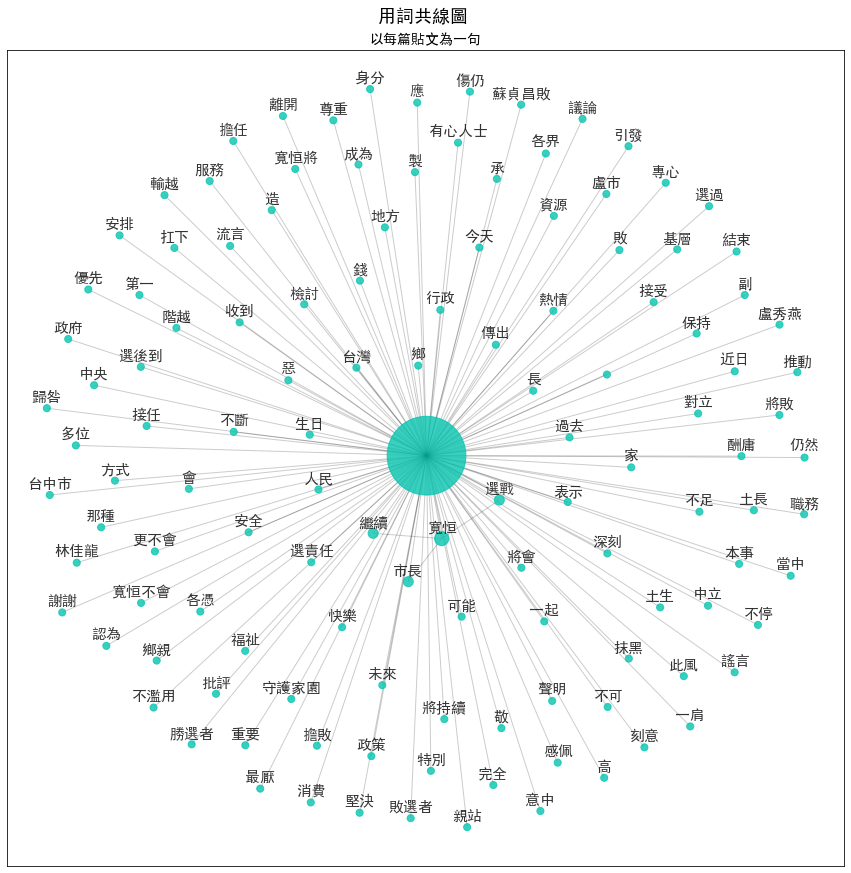

In [103]:
#準備畫出關聯圖    
plt.figure(figsize=(15,15))

plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['font.family']='sans-serif'

g = nx.Graph()
g.add_weighted_edges_from(co_occur_by_records_sig)
pos=nx.spring_layout(g)
nx.draw_networkx_nodes(g, pos, alpha=0.8,node_size=[val*50 for (node, val) in g.degree()], node_color='#08c5b1')
nx.draw_networkx_edges(g, pos, node_color='b', alpha=0.2)
for p in pos:  # raise text positions
    pos[p][1] = pos[p][1] + 0.03
nx.draw_networkx_labels(g, pos, font_size = 15, font_family='sans-serif', alpha=0.8)
plt.title('以每篇貼文為一句', size = 14)
plt.suptitle('用詞共線圖',x = 0.51,y=0.92, fontsize=18)
#plt.savefig("用詞共線圖_以每筆通聯紀錄為一句.png", dpi=100)
plt.show()

# **關聯圖**

In [6]:
import pandas as pd 
df = pd.read_csv("/Users/wombat/Desktop/課程筆記/政治與資訊/教學資料/CSV 資料集/10802_2020_tclw.csv") #匯資料
df["Post_Date"] = df["Date"].str.split(" ").str.get(0).str.title() #加Post_Date欄位
df['Post_Date'] = pd.to_datetime(df['Post_Date'])

In [7]:
df["Page_Name"] = df["Page_Name"].str.replace("三民惟新 陳柏惟","3Q 陳柏惟")

In [8]:
df_green = df[df['Page_Name']=='3Q 陳柏惟'][0:30]
df_green_New = df_green[['Post_Date', 'Message']]
df_green_New = df_green_New.dropna()
df_green_New['Message']

doc_names = range(len(df_green_New))
text_list = list(df_green_New['Message'])
df_green_docs = pd.DataFrame(columns=['jieba_results'])
df_green_docs['jieba_results'] = df_green_docs['jieba_results'].astype('str')

for i in doc_names:
    words = jieba.cut(text_list[i], cut_all = False)
    text = ''
    for word in words:
        text = text + ' ' + str(word)
    s = pd.Series({'jieba_results': text})
    df_green_docs = df_green_docs.append(s, ignore_index=True)  
    
df_green_New.reset_index(inplace=True)  #不設定的話會有錯亂的情形，data對不起來
df_green_New['jieba_results'] = df_green_docs
df_green_New['df_class'] = 'green'
df_green_New.head()

,index,Post_Date,Message,jieba_results,df_class
0,0,2020-01-12,【陳柏惟-勝選感言】\n\n謝謝你們，你們做到了。\n\n半年前，我來到這邊的時候，99%的...,【 陳 柏惟 - 勝選 感言 】 \n \n 謝謝 你 們 ， 你們 做到 了 。 \n ...,green
1,1,2020-01-11,凍蒜啦!!!,凍蒜 啦 ! ! !,green
2,3,2020-01-12,想找一張最冷靜的找不到，就找一張圖文不符的\n\n--\n\n很多事情要做，很多話想說\n\...,想 找 一張 最 冷靜 的 找 不到 ， 就 找 一張 圖文 不符 的 \n \n -- ...,green
3,4,2020-01-11,我現在心中只有感謝，等等要寫一篇像打贏大專杯的超級長文，但是因為要打很久，所以電話跟訊息都沒...,我現 在 心中 只有 感謝 ， 等等 要 寫 一篇 像 打 贏大 專杯 的 超級 長 文 ...,green
4,5,2020-01-11,有那個周六下午沒人的烏日三榮路高鐵球場？\n\n我等你，你帶球，到1540.\n\n沒投票的...,有 那個 周六 下午 沒人 的 烏日 三榮路 高鐵球場 ？ \n \n 我 等 你 ， 你...,green


In [9]:
df_blue = df[df['Page_Name']=='顏寬恒'][0:30]

df_blue_New = df_blue[['Post_Date', 'Message']]
df_blue_New = df_blue_New.dropna()
df_blue_New['Message']

doc_names = range(len(df_blue_New))
text_list = list(df_blue_New['Message'])
df_blue_docs = pd.DataFrame(columns=['jieba_results'])
df_blue_docs['jieba_results'] = df_blue_docs['jieba_results'].astype('str')

for i in doc_names:
    words = jieba.cut(text_list[i], cut_all = False)
    text = ''
    for word in words:
        text = text + ' ' + str(word)
    s = pd.Series({'jieba_results': text})
    if(text=='NAN'):
        print(text_list[i])
    elif(text==''):
        print(text_list[i])
    df_blue_docs = df_blue_docs.append(s, ignore_index=True)  
    
df_blue_New.reset_index(inplace=True)        
df_blue_New['jieba_results'] = df_blue_docs
df_blue_New['df_class'] = 'blue'
df_blue_New.head()

,index,Post_Date,Message,jieba_results,df_class
0,108,2020-01-14,《聲明》\n\n選戰結束後許多流言與惡意中傷仍不斷傳出，近日也傳出寬恒將接任台中市政府副市長...,《 聲明 》 \n \n 選戰 結束 後 許多 流言 與 惡 意中 傷仍 不斷 傳出 ， ...,blue
1,138,2020-01-15,先吃飽才有力氣工作啊😁😁😁,先 吃 飽 才 有力 氣 工作 啊 😁 😁 😁,blue
2,163,2020-01-11,深深一鞠躬，感謝大家，謝謝這段時間所有好朋友、志工夥伴、競選團隊，是寬恒努力不夠。\n\n寬...,深深 一 鞠躬 ， 感謝 大家 ， 謝謝 這段 時間 所有 好 朋友 、 志工夥伴 、 競...,blue
3,173,2020-01-12,《感恩有您》\n\n昨晚不斷的收到加油打氣的訊息，今天謝票時也有許多鄉親依然對我比了大大的讚...,《 感恩 有 您 》 \n \n 昨晚 不斷 的 收到 加油 打氣 的 訊息 ， 今天 謝...,blue
4,183,2019-09-14,🤔每年都是忙到忘記自己生日，今年從早到晚都有很多熱情的鄉親祝我生日快樂🎂，反倒有點不好意思，...,🤔 每年 都 是 忙 到 忘記 自己 生日 ， 今年 從 早 到 晚 都 有 很多 熱情 ...,blue


In [11]:
mergeData = df_blue_New.append(df_green_New)
mergeData = mergeData.dropna() #刪除有NAN值的data
#mergeData

# **TF-IDF**

In [12]:
corpus = mergeData['jieba_results'].values.tolist()


In [13]:
# TF-IDF
# coding:utf-8  
from sklearn.feature_extraction.text import CountVectorizer  
vectorizer = CountVectorizer()  
X = vectorizer.fit_transform(corpus)  
word = vectorizer.get_feature_names()  

from sklearn.feature_extraction.text import TfidfTransformer  
transformer = TfidfTransformer()  
tfidf = transformer.fit_transform(X)


In [14]:
len(corpus)
features = tfidf.toarray()
labels = mergeData['Post_Date'].values
#labels

# **PCA**

In [15]:
from pandas import DataFrame, read_csv
import numpy as np
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
transData = pca.fit_transform(features, labels)
type(transData)
mergeData['pca1'] = DataFrame(transData[:,0])
mergeData['pca2'] = DataFrame(transData[:,1])
#mergeData.head(150)

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

textFrame = pd.DataFrame(features, columns = word)
textFrame

,0113,102,105,108,11,12,130,1300,14,15,...,默默,點結,黨並,鼓勵,鼓勵過,鼠錢鼠,龍井,龍井人,龍井後援會,龍井麗水
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.0000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.0000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.0000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.152786,0.000000,0.000000,0.000000,0.0000,0.000000,0.0000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.0000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.0000
6,0.000000,0.000000,0.000000,0.000000,0.116013,0.000000,0.0000,0.0000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.0000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.0000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.0000
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.0000


In [17]:
allF = features.flatten()
nonZero = allF[np.nonzero(allF)]
m = np.median(nonZero)

In [18]:
allF[np.nonzero(allF)]

array([0.08674056, 0.04406593, 0.08674056, ..., 0.09943776, 0.13965936,
       0.13965936])

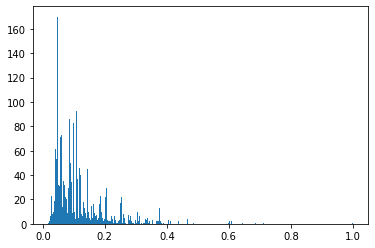

0.08956182151950925

In [19]:
plt.hist(nonZero, bins=500)
plt.show()
m

In [80]:
m = 0.235
dataset = list()
for i in range(len(features)):
    temp = textFrame.columns.values[tuple([textFrame.iloc[i] >= m])]  #有tuple error
    dataset.append(temp.tolist())

In [81]:
for i in range(len(features)):
    print(dataset[i])

['市長']
['工作', '有力']
[]
['我們', '鄉親']
['安全', '快樂', '熱情', '生日']
['中秋', '代替']
['我們', '民進', '看不出']
['口水', '汗水']
['國民黨', '團結']
['早安', '霧峰']
['11', '一號', '二號', '懇請', '抽號次', '支持', '韓國瑜', '顏寬恒']
['耕耘']
['一鼠', '事事', '健健康康', '到手', '吉祥', '大家鼠', '寬恒來', '抽筋', '拜年', '有情人', '眷鼠', '終成', '通通', '順利', '鼠錢鼠']
['15', '上班', '倒數', '新興路', '早安', '路口', '遊園', '龍井']
['16', '上班', '中山路', '倒數', '口送', '大道', '早安', '沙鹿']
['社會']
['烏日']
['三分之一', '常律', '把握', '老和尚']
['早安', '繼續', '耕耘', '霧峰', '顏寬恒']
['最後大衝', '衝吧', '龍井']
['12', '上班', '中蔗', '倒數', '大肚', '路口', '遊園', '陪您']
['中華民國', '國旗']
['12', '即將', '告一段落', '大家', '小時', '抱歉', '掃街', '行程', '說聲', '連續']
['mv', '朱市']
['朱立倫']
['仇記', '合唱', '找來', '朋友', '朱立倫市', '歡迎', '總不會輸', '這次']
['一段', '上班', '上課', '中山路', '倒數', '早安', '烏日', '興祥街']
['台灣']
['凍蒜']
[]
['3q', '一篇', '專杯', '我現', '等等', '贏了', '贏大', '超級', '跟訊息', '辦法', '電話']
['1540', '三榮路', '千萬別', '周六', '帶球', '未滿', '沒人', '除非', '高鐵球場']
['3q陳柏惟', '勝選', '感言']
['學校', '居然', '想不到', '真心', '第一天', '結束', '結果', '買菜', '選務', '錯路']
['3q', '一起', '前進', '努力', '烏日', '

# **apriori 關聯圖**

In [82]:
# Apriori: https://rasbt.github.io/mlxtend/user_guide/frequent_patterns/apriori/
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
graph = df.T
graph.columns = mergeData['Post_Date']

In [83]:
graph.tail()

Post_Date,2020-01-14,2020-01-15,2020-01-11,2020-01-12,2019-09-14,2019-09-12,2019-12-29,2019-11-25,2019-07-15,2019-11-02,...,2020-01-06,2020-01-12,2020-01-13,2020-01-11,2020-01-13,2020-01-17,2020-01-10,2020-01-12,2019-11-14,2020-01-09
顏寬恒,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
顏葛格,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
高鐵球場,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
鼠錢鼠,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
龍井,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False


In [84]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

minsup = 0.001
apriori(graph, min_support = minsup, use_colnames=True)

,support,itemsets
0,0.005025,(2020-01-14 00:00:00)
1,0.010050,(2020-01-15 00:00:00)
2,0.010050,(2020-01-12 00:00:00)
3,0.020101,(2019-09-14 00:00:00)
4,0.010050,(2019-09-12 00:00:00)
...,...,...
127,0.005025,"(2019-12-21 00:00:00, 2019-11-02 00:00:00, 202..."
128,0.005025,"(2019-12-27 00:00:00, 2019-12-26 00:00:00, 202..."
129,0.010050,"(2019-12-27 00:00:00, 2019-12-26 00:00:00, 202..."
130,0.005025,"(2019-12-07 00:00:00, 2020-01-02 00:00:00, 202..."


In [85]:
result = apriori(graph, min_support = minsup)
result

,support,itemsets
0,0.005025,(0)
1,0.010050,(1)
2,0.010050,(3)
3,0.020101,(4)
4,0.010050,(5)
...,...,...
127,0.005025,"(40, 9, 18, 34)"
128,0.005025,"(18, 26, 13, 14)"
129,0.010050,"(26, 20, 13, 14)"
130,0.005025,"(16, 26, 40, 34)"


In [86]:
rules = association_rules(result, metric="confidence", min_threshold=0.0)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(3),(6),0.010050,0.015075,0.005025,0.500000,33.166667,0.004874,1.969849
1,(6),(3),0.015075,0.010050,0.005025,0.333333,33.166667,0.004874,1.484925
2,(3),(54),0.010050,0.005025,0.005025,0.500000,99.500000,0.004975,1.989950
3,(54),(3),0.005025,0.010050,0.005025,1.000000,99.500000,0.004975,inf
4,(54),(6),0.005025,0.015075,0.005025,1.000000,66.333333,0.004949,inf


In [87]:
rules = association_rules(result, metric="lift", min_threshold=1.2)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(3),(6),0.010050,0.015075,0.005025,0.500000,33.166667,0.004874,1.969849
1,(6),(3),0.015075,0.010050,0.005025,0.333333,33.166667,0.004874,1.484925
2,(3),(54),0.010050,0.005025,0.005025,0.500000,99.500000,0.004975,1.989950
3,(54),(3),0.005025,0.010050,0.005025,1.000000,99.500000,0.004975,inf
4,(54),(6),0.005025,0.015075,0.005025,1.000000,66.333333,0.004949,inf


In [88]:
rules["antecedant_len"] = rules["antecedents"].apply(lambda x: len(x))
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedant_len
0,(3),(6),0.010050,0.015075,0.005025,0.500000,33.166667,0.004874,1.969849,1
1,(6),(3),0.015075,0.010050,0.005025,0.333333,33.166667,0.004874,1.484925,1
2,(3),(54),0.010050,0.005025,0.005025,0.500000,99.500000,0.004975,1.989950,1
3,(54),(3),0.005025,0.010050,0.005025,1.000000,99.500000,0.004975,inf,1
4,(54),(6),0.005025,0.015075,0.005025,1.000000,66.333333,0.004949,inf,1


In [89]:
out = rules[ (rules['antecedant_len'] >= 2) &
       (rules['confidence'] > 0.75) &
       (rules['lift'] > 1.2) ]
out.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedant_len
88,"(3, 54)",(6),0.005025,0.015075,0.005025,1.0,66.333333,0.004949,inf,2
89,"(54, 6)",(3),0.005025,0.010050,0.005025,1.0,99.500000,0.004975,inf,2
90,"(3, 6)",(54),0.005025,0.005025,0.005025,1.0,199.000000,0.005000,inf,2
94,"(9, 13)",(14),0.005025,0.040201,0.005025,1.0,24.875000,0.004823,inf,2
95,"(9, 14)",(13),0.005025,0.040201,0.005025,1.0,24.875000,0.004823,inf,2


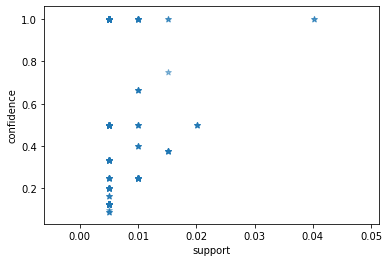

In [90]:
support = rules['support']
confidence = rules['confidence']
plt.scatter(support, confidence, alpha=0.5, marker="*")
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()

In [91]:
len(rules)
rules['antecedents'].head()

0     (3)
1     (6)
2     (3)
3    (54)
4    (54)
Name: antecedents, dtype: object

In [92]:
import networkx as nx
G = nx.DiGraph()
for i in range(len(mergeData)):
    G.add_node(i)
for i in range(len(rules['antecedents'])):
    currentFrom = list(rules['antecedents'][i])
    currentTo = list(rules['consequents'][i])
    for j in range(len(currentFrom)):
        G.add_edge(currentFrom[j], currentTo[0])

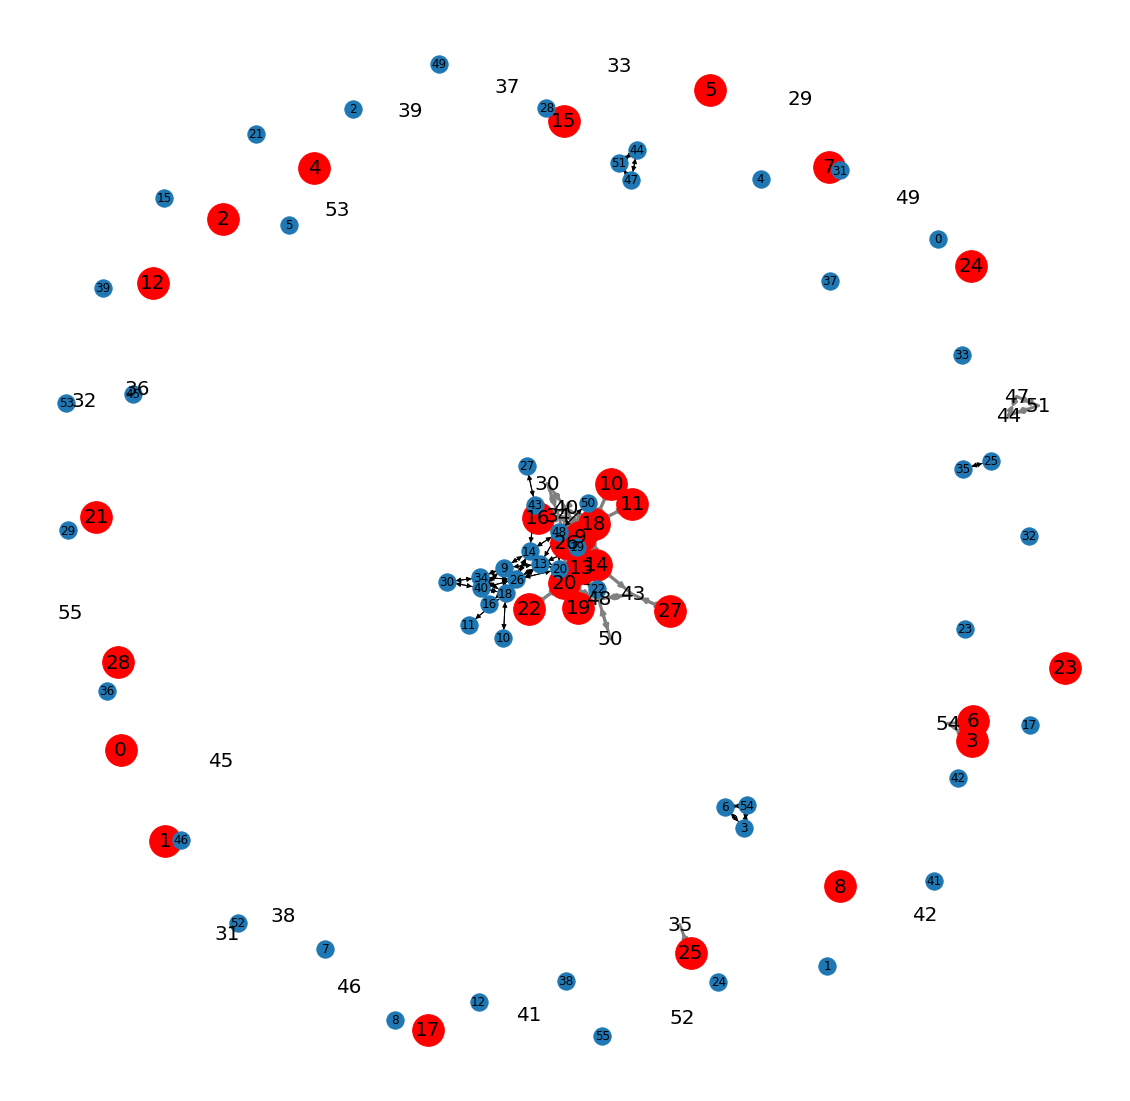

In [93]:
nodeListA = mergeData.index[mergeData['df_class'] == 'white'].tolist()
nodeListB = mergeData.index[mergeData['df_class'] == 'green'].tolist()
plt.figure(figsize=(20,20))

# positions for all nodes
pos = nx.spring_layout(G)

# nodes
nx.draw_networkx_nodes(G, pos, nodelist=nodeListA,node_color="blue", node_size=1000)
nx.draw_networkx_nodes(G, pos, nodelist=nodeListB,node_color="red",node_size=1000)
nx.draw_networkx_edges(G, pos, width=3,edge_color='gray')

# labels
nx.draw_networkx_labels(G,pos,font_size=20,font_family='sans-serif')
nx.draw(G, with_labels=True)

plt.axis('off')
plt.savefig("img/weighted_graph.png") # save as png

plt.show() # display